# Sequencing

# Volcano plots

Setup

In [ ]:
# Always load same package versions
groundhog.day <- "2024-01-01"
groundhog::meta.groundhog(groundhog.day) 


Now using 'groundhog_3.1.2'.

here() starts at C:/Users/alosvendsen/Documents/R/manuscript

Successfully attached 'data.table_1.14.10'

Successfully attached 'readxl_1.4.3'

Successfully attached 'ggplot2_3.4.4'

Successfully attached 'ggrepel_0.9.4'

Successfully attached 'here_1.0.1'

## IL-6 pooled

No sig up or down regulated genes when pooling IL-6 10 and 0.1 ng/ml

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL6_vs_vehicle.xlsx")
il6_pooled_data <- read_xlsx(file, sheet = 1)


setDT(il6_pooled_data)
il6_pooled_data[logCPM > 1 & logFC > 1 & FDR < 0.05]


Empty data.table (0 rows and 8 cols): matrixrow,ENSEMBL_ID,genes,logFC,logCPM,LR...

Empty data.table (0 rows and 8 cols): matrixrow,ENSEMBL_ID,genes,logFC,logCPM,LR...

As seen in empty dataframes there are no sig up or downregulated. Also seen in the volcano plot

In [ ]:
# Create a new column for labeling differential gene expression
il6_pooled_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il6_pooled_data$diffexpressed[il6_pooled_data$logFC > 1 & il6_pooled_data$FDR < 0.05 & il6_pooled_data$logCPM > 1] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il6_pooled_data$diffexpressed[il6_pooled_data$logFC < -1 & il6_pooled_data$FDR < 0.05 & il6_pooled_data$logCPM > 1] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il6_pooled_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il6_pooled_data$delabel[il6_pooled_data$diffexpressed != "NO"] <- il6_pooled_data$genes[il6_pooled_data$diffexpressed != "NO"]


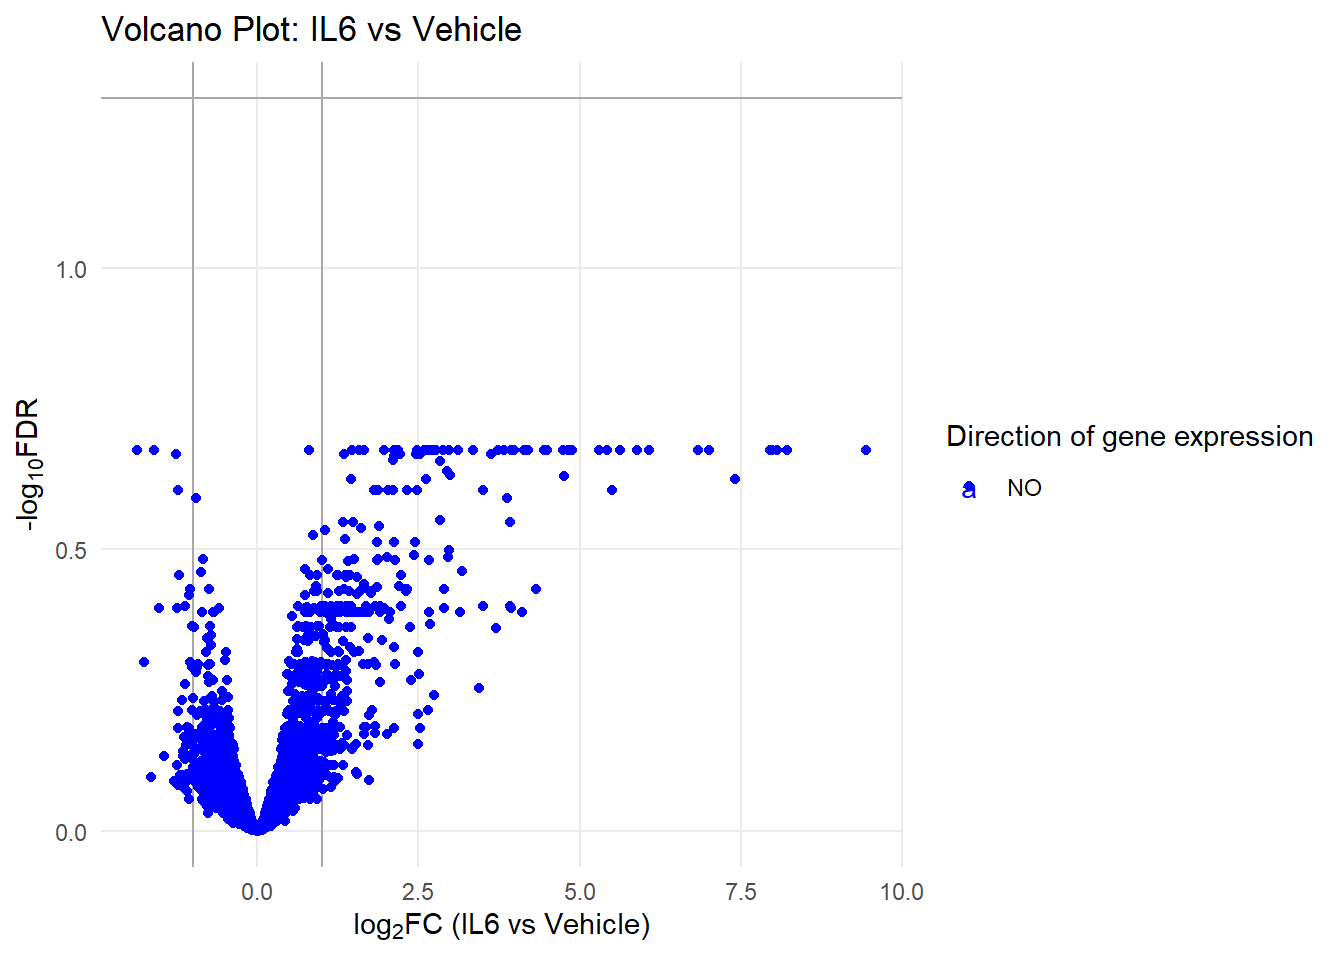

In [ ]:
# Create the volcano plot using ggplot2
plot_volcano_il6_pooled <- 
  ggplot(data=il6_pooled_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 7) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    #scale_x_continuous(breaks = seq(-11, 9, 2)) + # Customize x-axis breaks
    #scale_y_continuous(breaks = seq(0, 90, 10)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(), panel.grid.minor.x = element_blank())+ # Adjust minor grid lines
    ggtitle('Volcano Plot: IL6 vs Vehicle') # Add a title to the plot

plot_volcano_il6_pooled


## IL-6 10 ng/ml

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL6_10_vs_vehicle.xlsx")
il6_10_data <- read_xlsx(file, sheet = 1)


increasing max.overlaps

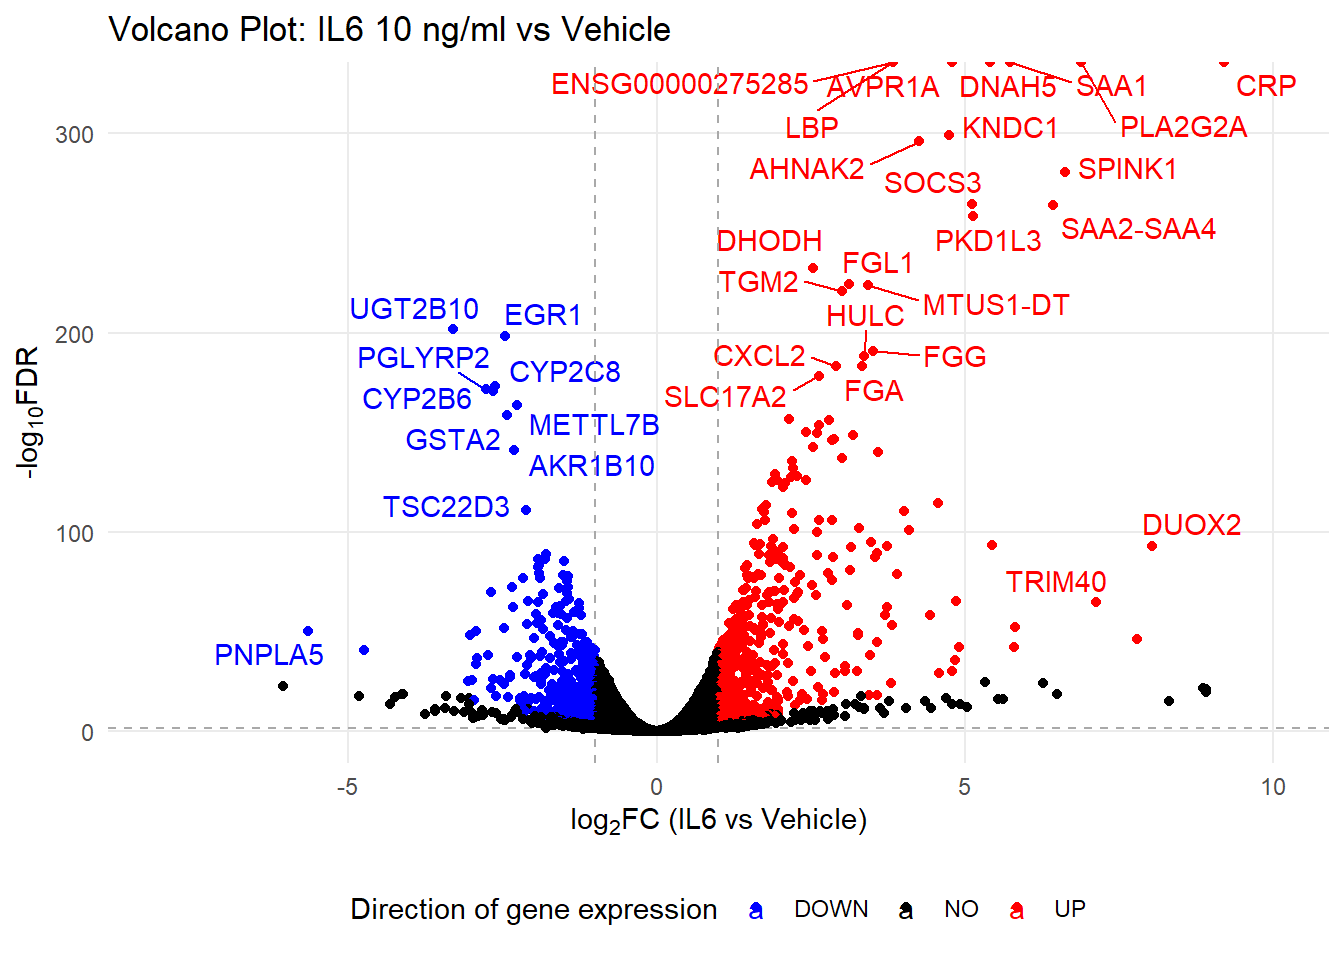

In [ ]:

# Create a new column for labeling differential gene expression
il6_10_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il6_10_data$diffexpressed[il6_10_data$logFC > 1 & il6_10_data$FDR < 0.05 & il6_10_data$logCPM > 1] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il6_10_data$diffexpressed[il6_10_data$logFC < -1 & il6_10_data$FDR < 0.05 & il6_10_data$logCPM > 1] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il6_10_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il6_10_data$delabel[il6_10_data$diffexpressed != "NO"] <- il6_10_data$genes[il6_10_data$diffexpressed != "NO"]

# Create the volcano plot using ggplot2
plot_volcano_il6_10 <- 
  ggplot(data=il6_10_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 10) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    scale_x_continuous(limits = c(-8, 10)) + # Customize x-axis breaks
    scale_y_continuous(limits = c(0, 320)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(),# Remove minor grid lines
          panel.grid.minor.x = element_blank(),# Remove minor grid lines
          legend.position = "bottom" 
          )+ 
    ggtitle('Volcano Plot: IL6 10 ng/ml vs Vehicle') # Add a title to the plot


plot_volcano_il6_10


Trying to ad a box around the out of bounds data points. They have a smaller FDR than can be handled.

In [ ]:
# # Adjusting the dataset to include points with FDR of 0
# il6_10_data$adjusted_FDR <- ifelse(il6_10_data$FDR == 0, 340, -log10(il6_10_data$FDR))
# 
# # Create the volcano plot using ggplot2
# plot_volcano_il6_10 <- 
#   ggplot(data=il6_10_data, aes(x=logFC, y=adjusted_FDR, col=diffexpressed, label=delabel)) + 
#     theme_minimal() +
#     geom_text_repel(max.overlaps = 10) +
#     scale_color_manual(values=c("blue", "black", "red")) +
#     geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") +
#     geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Use the new adjusted value
#     geom_point() +
#     labs(color = 'Direction of gene expression',
#          x = expression("log"[2]*"FC (IL6 vs Vehicle)"),
#          y = expression("-log"[10]*"Adjusted FDR")) +
#     scale_x_continuous(limits = c(-8, 10)) +
#     scale_y_continuous(limits = c(0, 450)) +
#     theme(
#       panel.grid.minor.y = element_blank(),
#       panel.grid.minor.x = element_blank(),
#       legend.position = "bottom"
#     ) +
#     annotate("rect", xmin = 1, xmax = 10, ymin = 320, ymax = 340, alpha = .2, color = "black") +
#     ggtitle('Volcano Plot: IL6 10 ng/ml vs Vehicle')
# 
# # Display the plot
# plot_volcano_il6_10


## IL-6 0.1 ng/ml

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL6_0.1_vs_vehicle.xlsx")
il6_0.1_data <- read_xlsx(file, sheet = 1)


setDT(il6_0.1_data)
il6_0.1_data[logCPM > 1 & FDR < 0.05 & logFC > 0] |> nrow()


[1] 25

[1] 8

Ikke nogen der er signifikant opreguleret når logFC \> 1 Kun to signifikant nedregulerede ved logFC \< -1

increasing max.overlaps

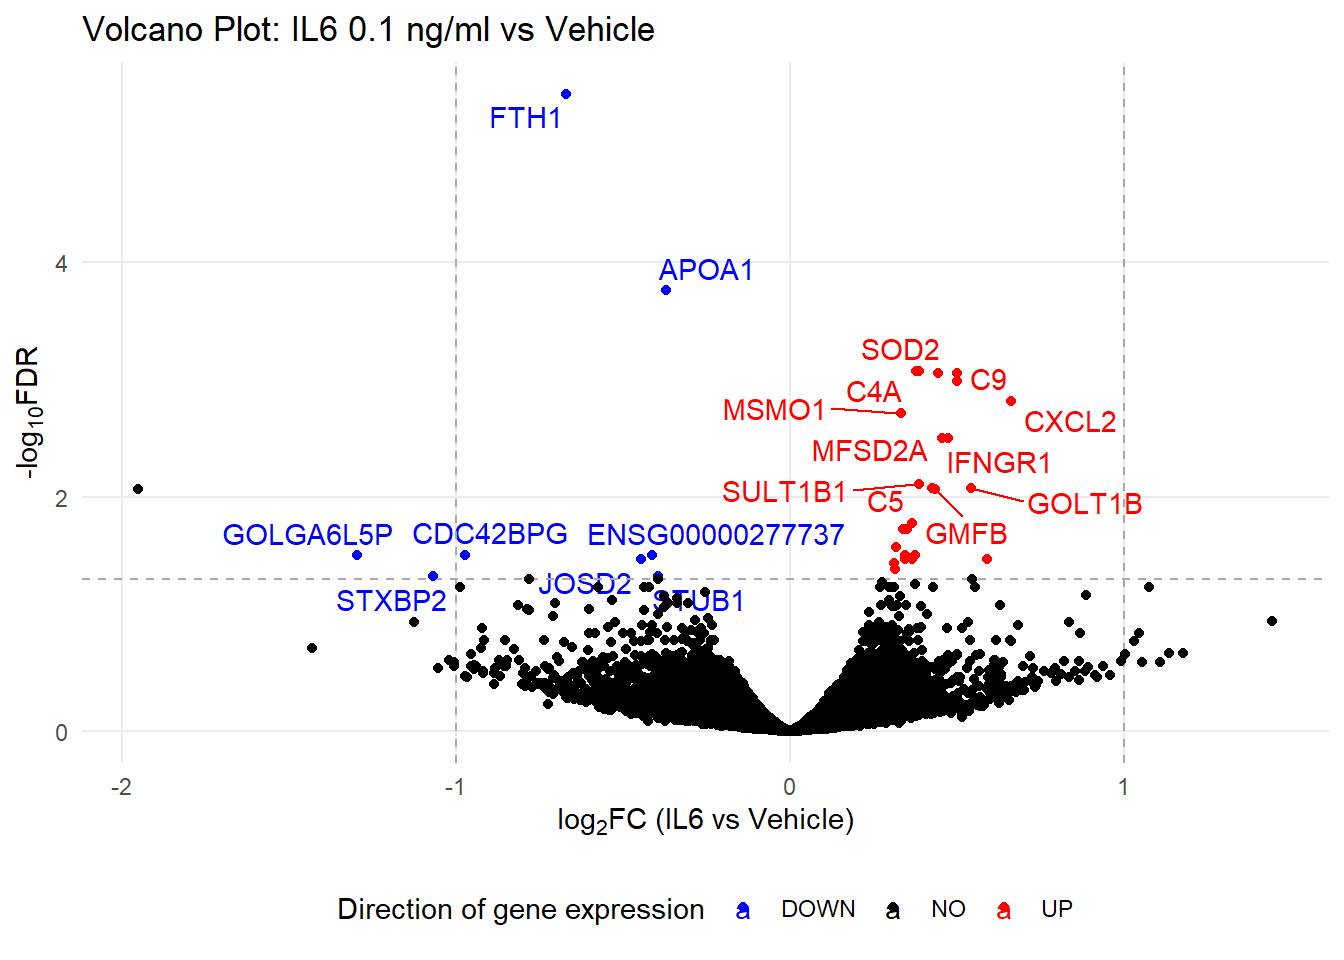

In [ ]:

# Create a new column for labeling differential gene expression
il6_0.1_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il6_0.1_data$diffexpressed[il6_0.1_data$FDR < 0.05 & il6_0.1_data$logCPM > 1 & il6_0.1_data$logFC > 0] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il6_0.1_data$diffexpressed[il6_0.1_data$FDR < 0.05 & il6_0.1_data$logCPM > 1 & il6_0.1_data$logFC < 0] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il6_0.1_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il6_0.1_data$delabel[il6_0.1_data$diffexpressed != "NO"] <- il6_0.1_data$genes[il6_0.1_data$diffexpressed != "NO"]

# Create the volcano plot using ggplot2
plot_volcano_il6_0.1 <- 
  ggplot(data=il6_0.1_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 10) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    #scale_x_continuous(limits = c(-8, 10)) + # Customize x-axis breaks
    #scale_y_continuous(limits = c(0, 320)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(),# Remove minor grid lines
          panel.grid.minor.x = element_blank(),# Remove minor grid lines
          legend.position = "bottom" 
          )+ 
    ggtitle('Volcano Plot: IL6 0.1 ng/ml vs Vehicle') # Add a title to the plot


plot_volcano_il6_0.1


## IL-1B pooled

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL1B_vs_vehicle.xlsx")
il1B_pooled_data <- read_xlsx(file, sheet = 1)


setDT(il1B_pooled_data)
il1B_pooled_data[logCPM > 1 & FDR < 0.05 & logFC > 1] |> nrow()


[1] 241

[1] 104

increasing max.overlaps

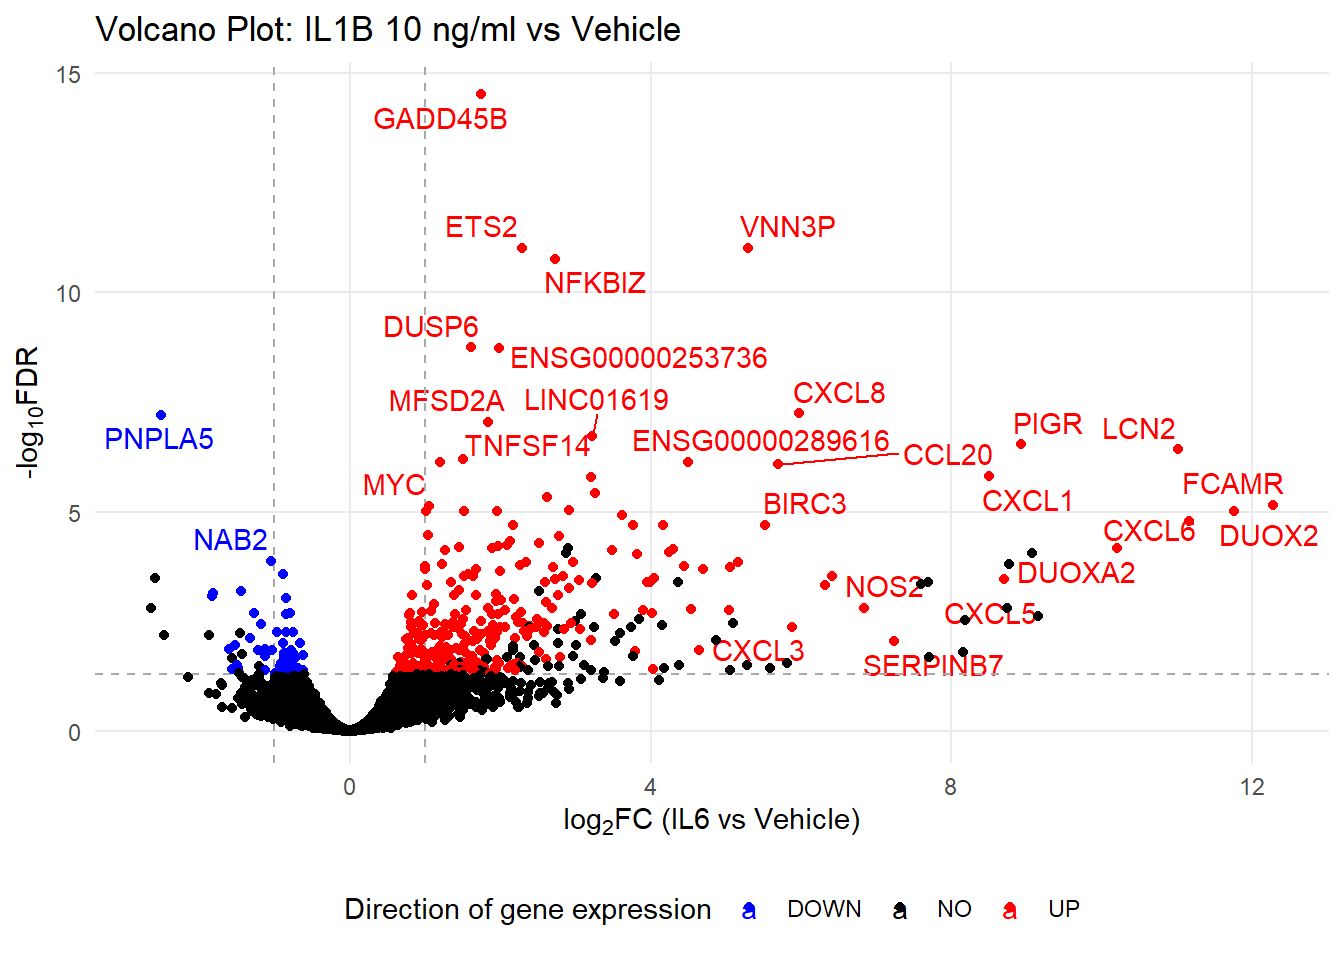

In [ ]:

# Create a new column for labeling differential gene expression
il1B_pooled_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il1B_pooled_data$diffexpressed[il1B_pooled_data$FDR < 0.05 & il1B_pooled_data$logCPM > 1 & il1B_pooled_data$logFC > 0] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il1B_pooled_data$diffexpressed[il1B_pooled_data$FDR < 0.05 & il1B_pooled_data$logCPM > 1 & il1B_pooled_data$logFC < 0] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il1B_pooled_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il1B_pooled_data$delabel[il1B_pooled_data$diffexpressed != "NO"] <- il1B_pooled_data$genes[il1B_pooled_data$diffexpressed != "NO"]

# Create the volcano plot using ggplot2
plot_volcano_il1B_pooled <- 
  ggplot(data=il1B_pooled_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 10) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    #scale_x_continuous(limits = c(-8, 10)) + # Customize x-axis breaks
    #scale_y_continuous(limits = c(0, 320)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(),# Remove minor grid lines
          panel.grid.minor.x = element_blank(),# Remove minor grid lines
          legend.position = "bottom" 
          )+ 
    ggtitle('Volcano Plot: IL1B 10 ng/ml vs Vehicle') # Add a title to the plot


plot_volcano_il1B_pooled


## IL-1B 10 ng/ml

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL1B_10_vs_vehicle.xlsx")
il1B_10_data <- read_xlsx(file, sheet = 1)


setDT(il1B_10_data)
il1B_10_data[logCPM > 1 & FDR < 0.05 & logFC > 1] |> nrow()


[1] 648

[1] 5111

increasing max.overlaps

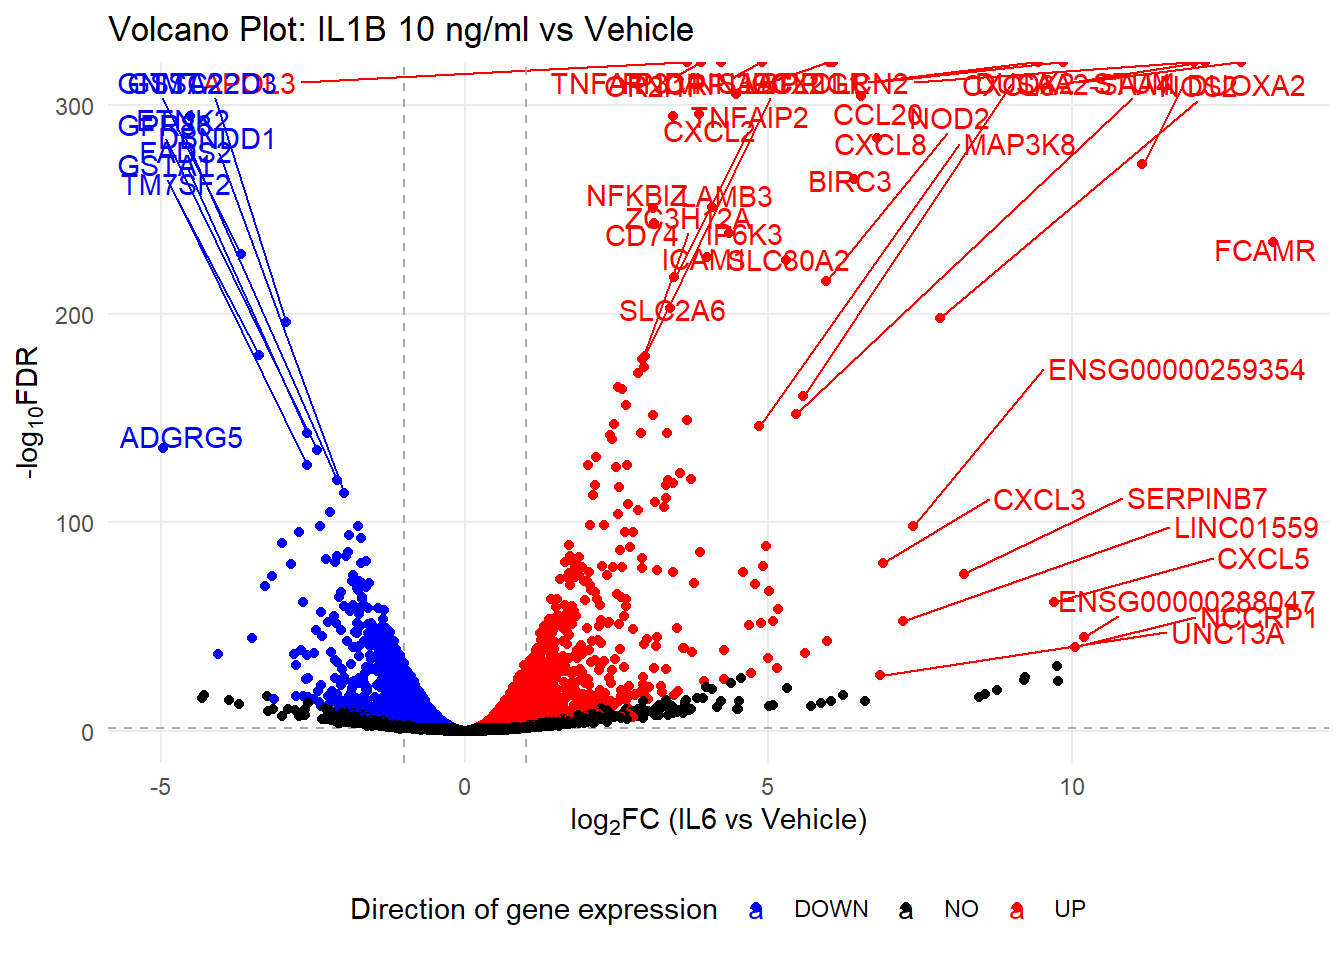

In [ ]:

# Create a new column for labeling differential gene expression
il1B_10_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il1B_10_data$diffexpressed[il1B_10_data$FDR < 0.05 & il1B_10_data$logCPM > 1 & il1B_10_data$logFC > 0] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il1B_10_data$diffexpressed[il1B_10_data$FDR < 0.05 & il1B_10_data$logCPM > 1 & il1B_10_data$logFC < 0] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il1B_10_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il1B_10_data$delabel[il1B_10_data$diffexpressed != "NO"] <- il1B_10_data$genes[il1B_10_data$diffexpressed != "NO"]

# Create the volcano plot using ggplot2
plot_volcano_il1B_0.1 <- 
  ggplot(data=il1B_10_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 10) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    #scale_x_continuous(limits = c(-8, 10)) + # Customize x-axis breaks
    #scale_y_continuous(limits = c(0, 320)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(),# Remove minor grid lines
          panel.grid.minor.x = element_blank(),# Remove minor grid lines
          legend.position = "bottom" 
          )+ 
    ggtitle('Volcano Plot: IL1B 10 ng/ml vs Vehicle') # Add a title to the plot


plot_volcano_il1B_0.1


## IL-1B 0.1 ng/ml

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL1B_0.1_vs_vehicle.xlsx")
il1B_0.1_data <- read_xlsx(file, sheet = 1)


setDT(il1B_0.1_data)
il1B_0.1_data[logCPM > 1 & FDR < 0.05 & logFC > 1] |> nrow()


[1] 106

[1] 684

increasing max.overlaps

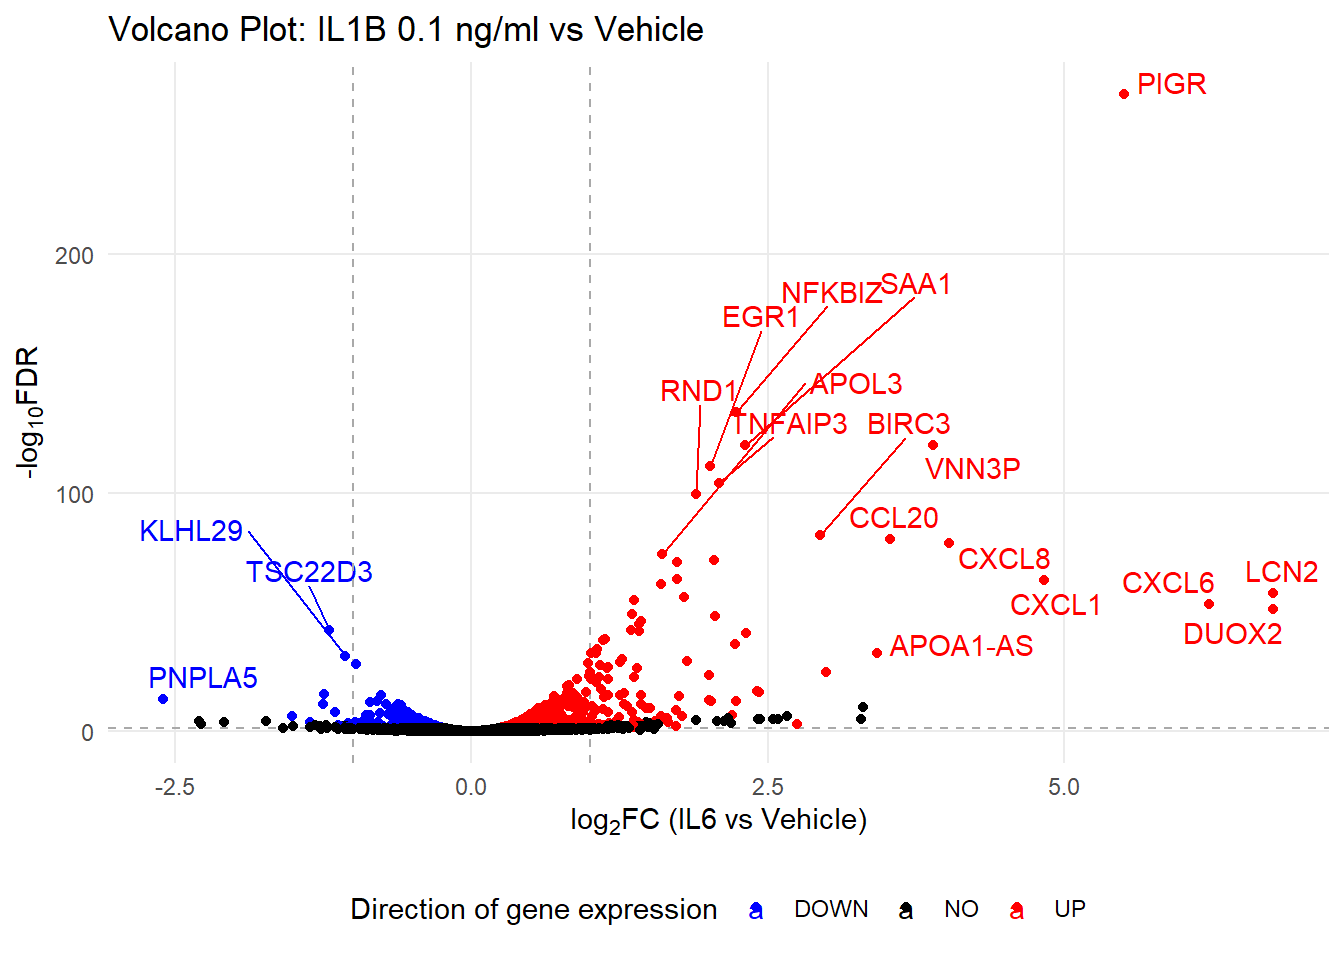

In [ ]:

# Create a new column for labeling differential gene expression
il1B_0.1_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il1B_0.1_data$diffexpressed[il1B_0.1_data$FDR < 0.05 & il1B_0.1_data$logCPM > 1 & il1B_0.1_data$logFC > 0] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il1B_0.1_data$diffexpressed[il1B_0.1_data$FDR < 0.05 & il1B_0.1_data$logCPM > 1 & il1B_0.1_data$logFC < 0] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il1B_0.1_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il1B_0.1_data$delabel[il1B_0.1_data$diffexpressed != "NO"] <- il1B_0.1_data$genes[il1B_0.1_data$diffexpressed != "NO"]

# Create the volcano plot using ggplot2
plot_volcano_il1B_0.1 <- 
  ggplot(data=il1B_0.1_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 7) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    #scale_x_continuous(limits = c(-8, 10)) + # Customize x-axis breaks
    #scale_y_continuous(limits = c(0, 320)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(),# Remove minor grid lines
          panel.grid.minor.x = element_blank(),# Remove minor grid lines
          legend.position = "bottom" 
          )+ 
    ggtitle('Volcano Plot: IL1B 0.1 ng/ml vs Vehicle') # Add a title to the plot


plot_volcano_il1B_0.1


## Abemaciclib 5 µM

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/abe_vs_vehicle.xlsx")
abe_data <- read_xlsx(file, sheet = 1)


setDT(abe_data)
abe_data[logCPM > 1 & FDR < 0.05 & logFC > 1] 


     matrixrow      ENSEMBL_ID           genes    logFC   logCPM         LR
  1:      1656 ENSG00000140470        ADAMTS17 2.736348 6.631470 569.837805
  2:      4904 ENSG00000161896           IP6K3 2.729978 4.906166 441.472543
  3:      5856 ENSG00000157557            ETS2 2.826833 4.472978 371.842471
  4:      6006 ENSG00000169258          GPRIN1 3.182320 4.438138 368.052632
  5:      1033 ENSG00000156510           HKDC1 2.291036 7.161496 338.469713
 ---                                                                       
543:     11113 ENSG00000069812            HES2 1.055350 1.028193  11.189460
544:     10925 ENSG00000266313 ENSG00000266313 1.019175 1.183450  10.890585
545:     10956 ENSG00000232679       LINC01705 1.006567 1.166972   9.967888
546:     11004 ENSG00000120334           CENPL 1.104778 1.134940   8.230452
547:     10463 ENSG00000163399          ATP1A1 1.028020 1.509585   7.652900
            PValue           FDR
  1: 6.089737e-126 9.712369e-123
  2:  5.175655e-98  3.

      matrixrow      ENSEMBL_ID     genes      logFC    logCPM          LR
   1:       193 ENSG00000124253      PCK1 -7.3910348  8.918734 2613.265382
   2:       278 ENSG00000138115    CYP2C8 -4.0321531  8.470964 1187.675046
   3:        82 ENSG00000197408    CYP2B6 -2.8311130 10.051964  729.734930
   4:       120 ENSG00000134240    HMGCS2 -2.8577733  9.588448  708.417598
   5:      2647 ENSG00000157087    ATP2B2 -3.1479931  5.947785  687.874644
  ---                                                                     
5912:       162 ENSG00000108654      DDX5  0.2229198  9.205413    4.839048
5913:      3249 ENSG00000186815     TPCN1 -0.2558597  5.666161    4.837830
5914:      7447 ENSG00000151320     AKAP6 -0.3351600  3.669124    4.833075
5915:     10108 ENSG00000137970    RPL7P9  0.5536888  1.801992    4.827948
5916:     11100 ENSG00000226696 LENG8-AS1 -0.6814634  1.042936    4.823560
             PValue           FDR
   1:  0.000000e+00  0.000000e+00
   2: 2.909826e-260 1.856323e-25

In [ ]:
# #| label: fig-abemaceclib
# #| fig-cap: "Volcano plot. Abemaciclib vs. vehicle control. Vertical lines for fold change thresholds"
# #| warning: false
# 
# # Create a new column for labeling differential gene expression
# abe_data$diffexpressed <- "NO" # Default value for genes not differentially expressed
# 
# # Identify and label upregulated genes
# # Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
# abe_data$diffexpressed[abe_data$FDR < 0.05 & abe_data$logCPM > 1 & abe_data$logFC > 0] <- "UP"
# 
# # Identify and label downregulated genes
# # Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
# abe_data$diffexpressed[abe_data$FDR < 0.05 & abe_data$logCPM > 1 & abe_data$logFC < 0] <- "DOWN"
# 
# # Initialize 'delabel' column to NA for all rows to create the column
# abe_data$delabel <- NA
# 
# # Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
# abe_data$delabel[abe_data$diffexpressed != "NO"] <- abe_data$genes[abe_data$diffexpressed != "NO"]
# 
# # Create the volcano plot using ggplot2
# plot_volcano_abe <- 
#   ggplot(data=abe_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
#     theme_minimal() + # Use a minimal theme for the plot
#     geom_text_repel() + # Use repelling text to avoid label overlap
#     scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
#     geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") + # Vertical lines for fold change thresholds
#     geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Horizontal line for FDR threshold
#     geom_point() + # Add points for each gene
#     labs(color = 'Direction of gene expression', # Customize legend title
#          x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
#          y = expression("-log"[10]*"FDR")) + # Customize y-axis label
#     #scale_x_continuous(limits = c(-8, 10)) + # Customize x-axis breaks
#     #scale_y_continuous(limits = c(0, 320)) + # Customize y-axis breaks
#     theme(panel.grid.minor.y = element_blank(),# Remove minor grid lines
#           panel.grid.minor.x = element_blank(),# Remove minor grid lines
#           legend.position = "bottom",
#           panel.background = element_rect(fill = "white")
#           )+ 
#   coord_flip() +
#     ggtitle('Volcano Plot: 5 µM abemaciclib vs Vehicle') # Add a title to the plot 
# 
# 
# 
# plot_volcano_abe
# 
# ggsave(filename = here("notebooks/seq/output/abe_volcano.png"))
